# Introduction

Importing and understanding the data at hand

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [37]:
#import csv file/dtaset into notebook
loan=pd.read_csv('loan-train.csv')

In [38]:
#display the first and last 5 rows
loan.head().append(loan.tail())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [39]:

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [40]:
#return number of missing values in the data set
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
#number of columns and rows
loan.shape

(614, 13)

Eligible customers=422
Non-Eligible customers=192


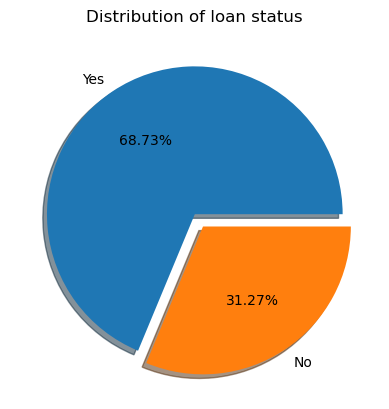

In [42]:
explode = (0,0.1)
plt.pie(loan['Loan_Status'].value_counts(),
       labels=['Yes','No'],autopct='%.2f%%',shadow=True,explode=explode)
plt.title('Distribution of loan status')

print("Eligible customers=" 
      + str(len(loan[loan['Loan_Status'] == 'Y'])))
print("Non-Eligible customers=" 
      + str(len(loan[loan['Loan_Status'] == 'N'])))


plt.show()

422 out of the 614 were eligible to get loans

In [43]:
#Information of the gender column in number of males, females and others/null values
others=loan['Gender'].isnull().sum()
print("Male=" 
      + str(len(loan[loan['Gender'] == 'Male'])))
print("Female=" 
      + str(len(loan[loan['Gender'] == 'Female'])))
print("Others=",others) 

Male=489
Female=112
Others= 13


13 customers have no gender input

## Data Exploration

In [44]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
#continous variables univariate analysis
loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [46]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
#analyse top 5 applicants with the highest income compared to gender,education,applicantincome,dependents,credit history,property area and loan status
loan[['Loan_ID', 'Gender','Education','Dependents','ApplicantIncome','Credit_History','Self_Employed','Property_Area','Loan_Status']].sort_values('ApplicantIncome',ascending=0).head()

,Loan_ID,Gender,Education,Dependents,ApplicantIncome,Credit_History,Self_Employed,Property_Area,Loan_Status
409,LP002317,Male,Graduate,3+,81000,0.0,No,Rural,N
333,LP002101,Male,Graduate,0,63337,1.0,NaN,Urban,Y
171,LP001585,NaN,Graduate,3+,51763,1.0,No,Urban,Y
155,LP001536,Male,Graduate,3+,39999,0.0,No,Semiurban,Y
185,LP001640,Male,Graduate,0,39147,1.0,Yes,Semiurban,Y


In [48]:
#analyse top 5 applicants with the lowest income compared to gender,education,applicantincome,dependents,credit history,property area and loan status
loan[['Loan_ID', 'Gender','Education','Dependents','ApplicantIncome','Credit_History','Self_Employed','Property_Area','Loan_Status']].sort_values('ApplicantIncome',ascending=0).tail()

,Loan_ID,Gender,Education,Dependents,ApplicantIncome,Credit_History,Self_Employed,Property_Area,Loan_Status
188,LP001644,NaN,Graduate,0,674,1.0,Yes,Rural,Y
500,LP002603,Female,Graduate,0,645,1.0,No,Rural,Y
600,LP002949,Female,Graduate,3+,416,NaN,NaN,Urban,N
468,LP002502,Female,Not Graduate,2,210,1.0,NaN,Semiurban,Y
216,LP001722,Male,Graduate,0,150,1.0,No,Rural,N


In [49]:
#top 10 co-applicants and applicants analysis with highest loan amounts
loan[['Loan_ID','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Self_Employed','Property_Area','Loan_Status']].sort_values('LoanAmount',ascending=0).head(10)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Self_Employed,Property_Area,Loan_Status
171,LP001585,3+,51763,0.0,700.0,1.0,No,Urban,Y
130,LP001469,0,20166,0.0,650.0,NaN,Yes,Urban,Y
155,LP001536,3+,39999,0.0,600.0,0.0,No,Semiurban,Y
561,LP002813,1,19484,0.0,600.0,1.0,Yes,Semiurban,Y
369,LP002191,0,19730,5266.0,570.0,1.0,No,Rural,N
487,LP002547,1,18333,0.0,500.0,1.0,No,Urban,N
604,LP002959,1,12000,0.0,496.0,1.0,No,Semiurban,Y
177,LP001610,3+,5516,11300.0,495.0,0.0,No,Semiurban,N
333,LP002101,0,63337,0.0,490.0,1.0,NaN,Urban,Y
308,LP001996,0,20233,0.0,480.0,1.0,No,Rural,N


Text(0.5, 0.98, '')

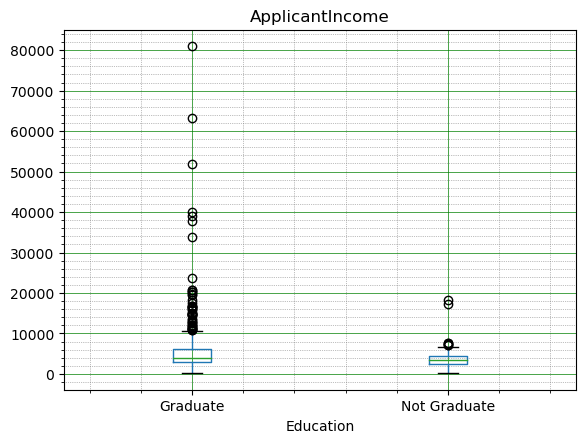

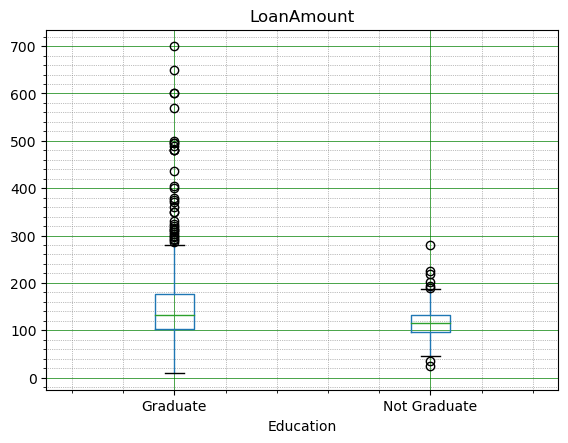

In [50]:
#Applicant income vs education
loan.boxplot(column='ApplicantIncome', by = 'Education') 
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.minorticks_on()
plt.suptitle('')

#loan amount vs education
loan.boxplot(column='LoanAmount', by = 'Education') 
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.minorticks_on()
plt.suptitle('')

1.Most people with high income are graduates with most ranging from 0 to 10000
    2.Most customers who take loans are graduates with most picking loans of 100 plus

Text(0.5, 0.98, '')

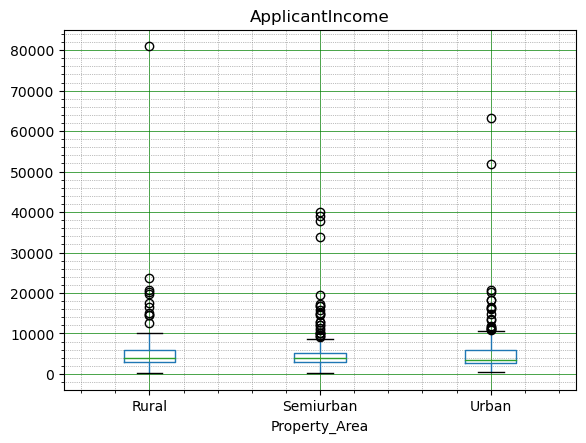

In [51]:
#applicant income vs property area
loan.boxplot(column='ApplicantIncome', by = 'Property_Area') 
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.minorticks_on()
plt.suptitle('')

Most customers are from semiurban areas, with most of them having an income of 20000 and below. All applicants in different property areas have the same amount of income median.

Text(0.5, 0.98, '')

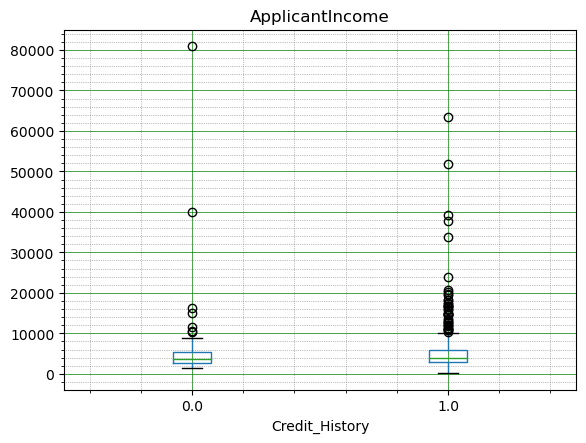

In [52]:
#applicant income vs credit history
loan.boxplot(column='ApplicantIncome', by = 'Credit_History') 
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.minorticks_on()
plt.suptitle('')

0 = Defaulter(risk of not paying)
1 = non_defaulter(pay full amount and on time)


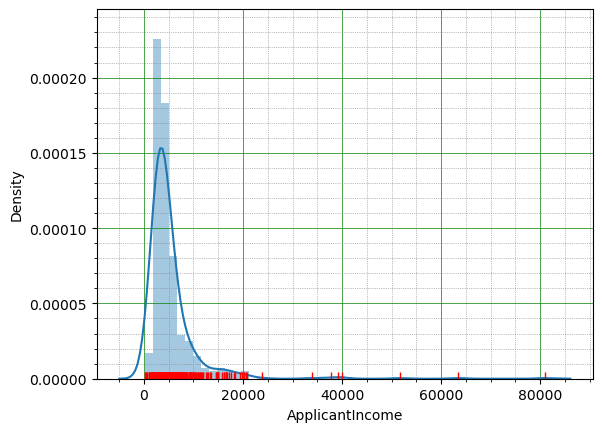

In [53]:
#Histogram bars indicate the applicants income within a certain bar
sns.distplot(loan['ApplicantIncome'])
sns.rugplot(loan['ApplicantIncome'],color='r', height=0.019, axis='x')
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.minorticks_on()
plt.show()

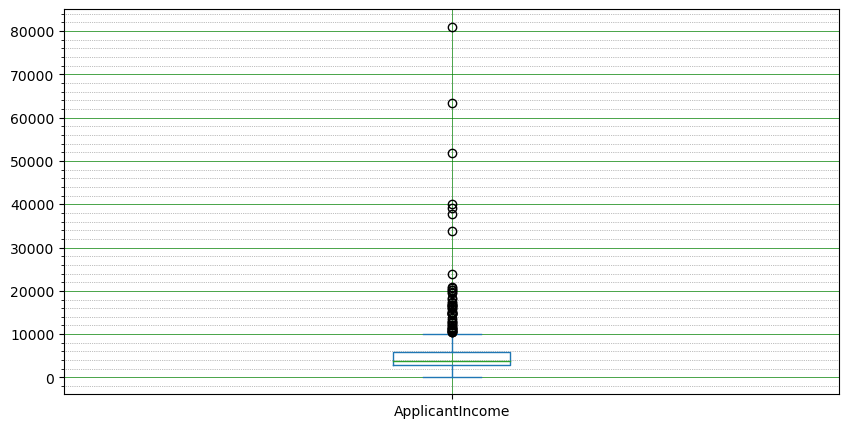

In [54]:
#box plot to show median of applicants income
loan['ApplicantIncome'].plot.box(figsize=(10,5))
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.minorticks_on()
plt.show()

presence of extreme values/outliers with majority from 10000 and below

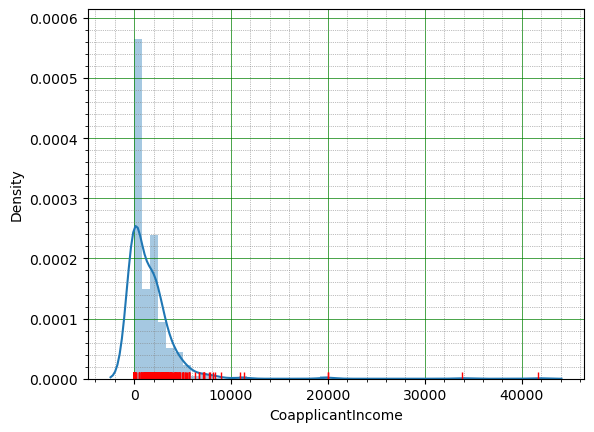

In [55]:
#Histogram bars indicate the coapplicants income within a certain bar
sns.distplot(loan['CoapplicantIncome'])
sns.rugplot(loan['CoapplicantIncome'],color='r', height=0.019, axis='x')
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.minorticks_on()
plt.show()

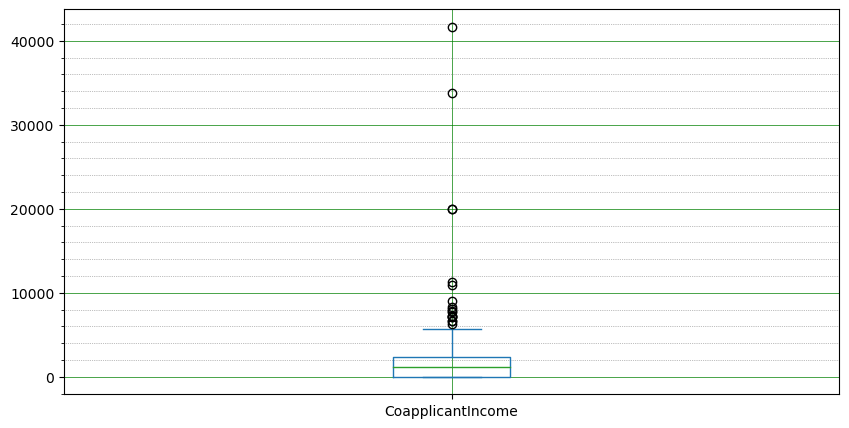

In [56]:
#box plot to show median of coapplicants income
loan['CoapplicantIncome'].plot.box(figsize=(10,5))
plt.grid()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='g')
plt.minorticks_on()
plt.show()

presence of extreme values/outliers with majority from 5000 and below

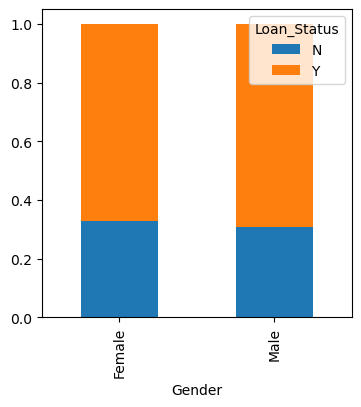

In [57]:
#gender vs loan status analysis stacked bargraph 
Gender=pd.crosstab(loan['Gender'],loan['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

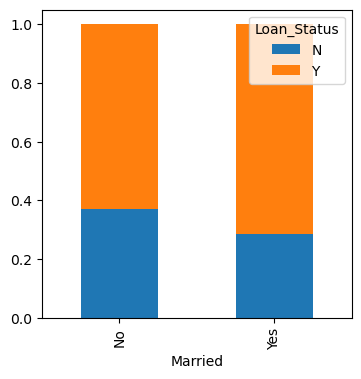

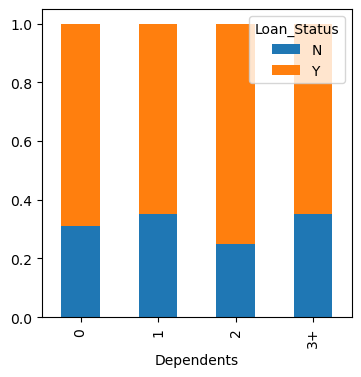

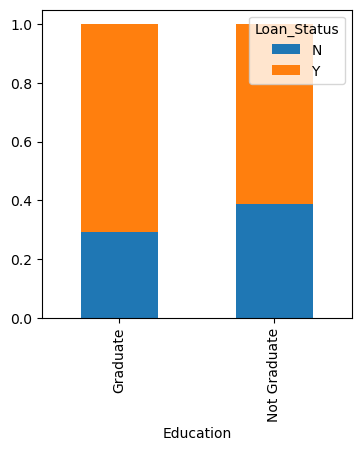

In [58]:
#gender vs loan status analysis stacked bargraph 
Married=pd.crosstab(loan['Married'],loan['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

#dependants vs loan status analysis stacked bargraph 
Dependents=pd.crosstab(loan['Dependents'],loan['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

#education vs loan status analysis stacked bargraph 
Education=pd.crosstab(loan['Education'],loan['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

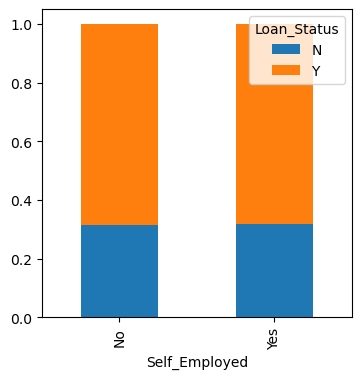

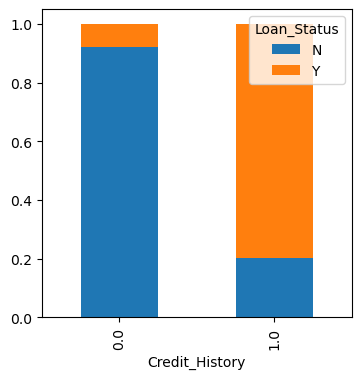

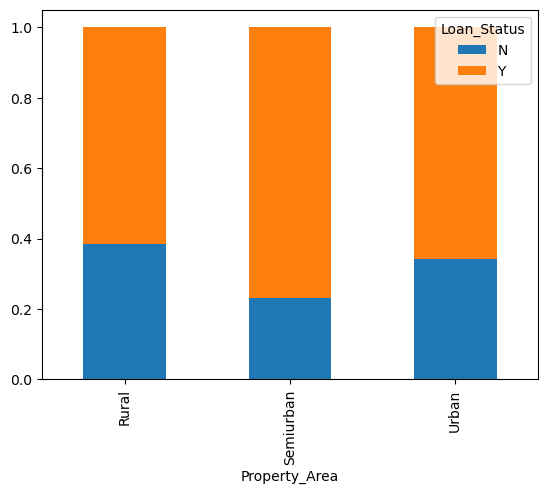

In [59]:
#self employed vs loan status analysis stacked bargraph 
Self_Employed=pd.crosstab(loan['Self_Employed'],loan['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

#credit history vs loan status analysis stacked bargraph 
Credit_History=pd.crosstab(loan['Credit_History'],loan['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

#property area vs loan status analysis stacked bargraph 
Property_Area=pd.crosstab(loan['Property_Area'],loan['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

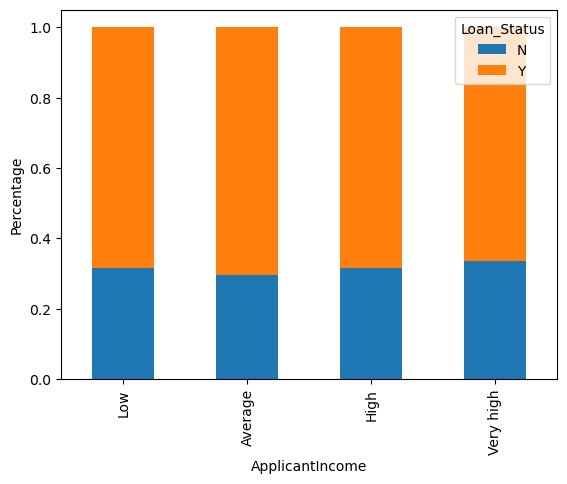

In [60]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
loan['Income']=pd.cut(loan['ApplicantIncome'],bins,labels=group)

Income=pd.crosstab(loan['Income'],loan['Loan_Status']) 
Income.div(Income.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

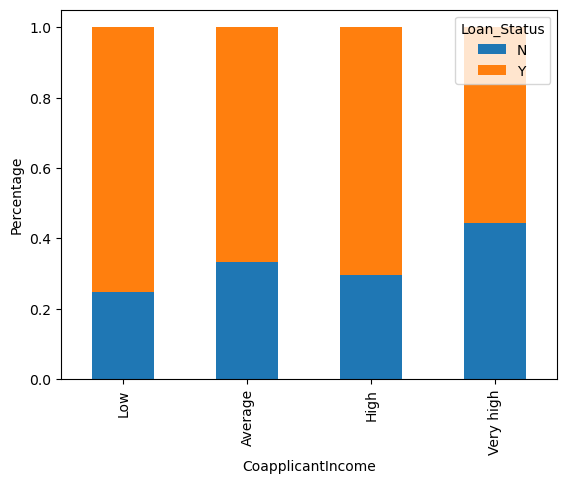

In [61]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
loan['Income']=pd.cut(loan['CoapplicantIncome'],bins,labels=group)

Income=pd.crosstab(loan['Income'],loan['Loan_Status']) 
Income.div(Income.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

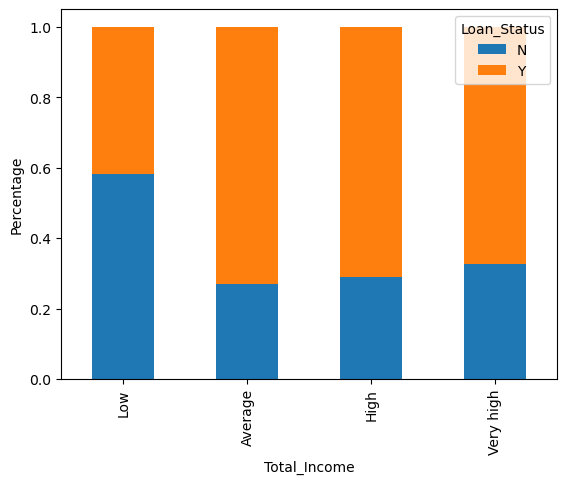

In [62]:
#***
#variables
loan['Total_Income']=loan['ApplicantIncome']+loan['CoapplicantIncome']
#bin based on highest value income, median income and other lower incomes input
bins=[0,2500,4000,6000,90000]
group=['Low','Average','High','Very high']

loan['Total_Income_bin']=pd.cut(loan['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(loan['Total_Income_bin'],loan['Loan_Status'])

Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

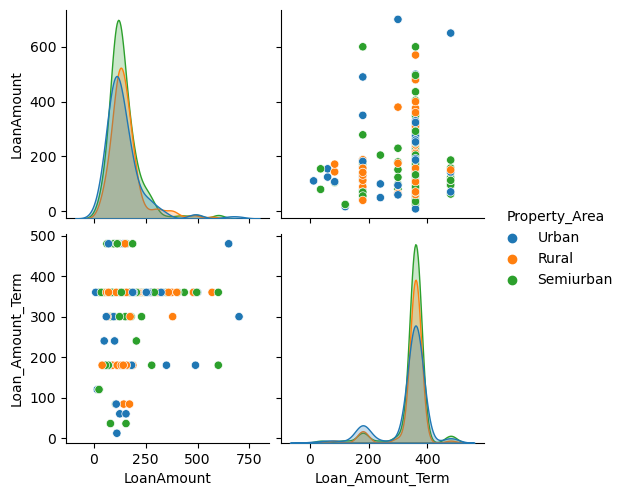

In [63]:
#multivariate analysis of continous data to categorical data
#cat=hue, num=vars
sns.pairplot(loan, 
             vars=['LoanAmount','Loan_Amount_Term'],
             hue='Property_Area')


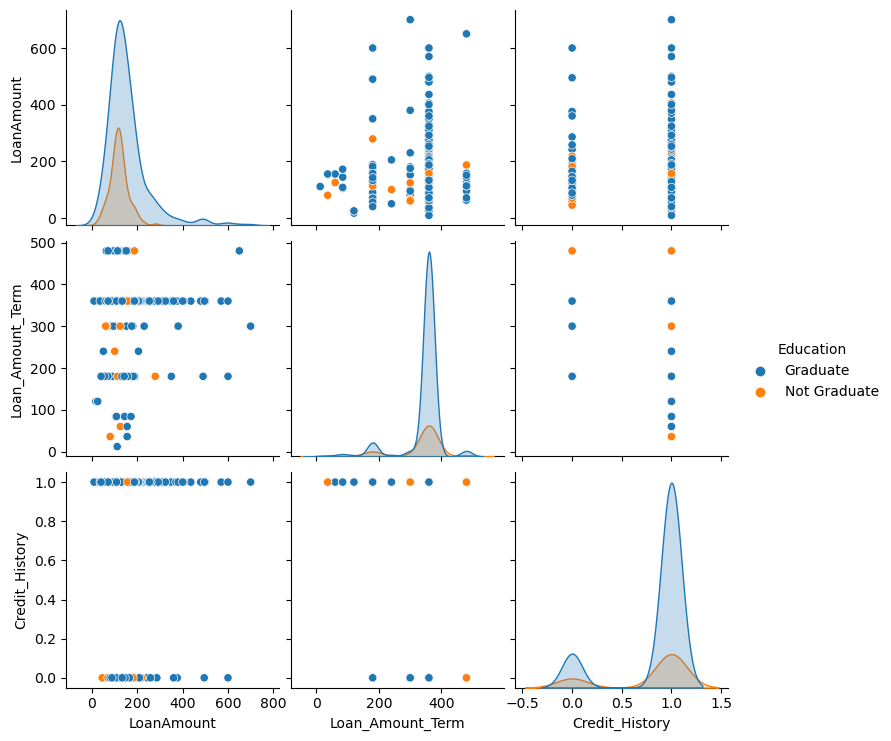

In [64]:
#multivariate analysis of continous data to categorical data
#cat=hue, num=vars
sns.pairplot(loan, vars=['LoanAmount','Loan_Amount_Term','Credit_History'],hue='Education')


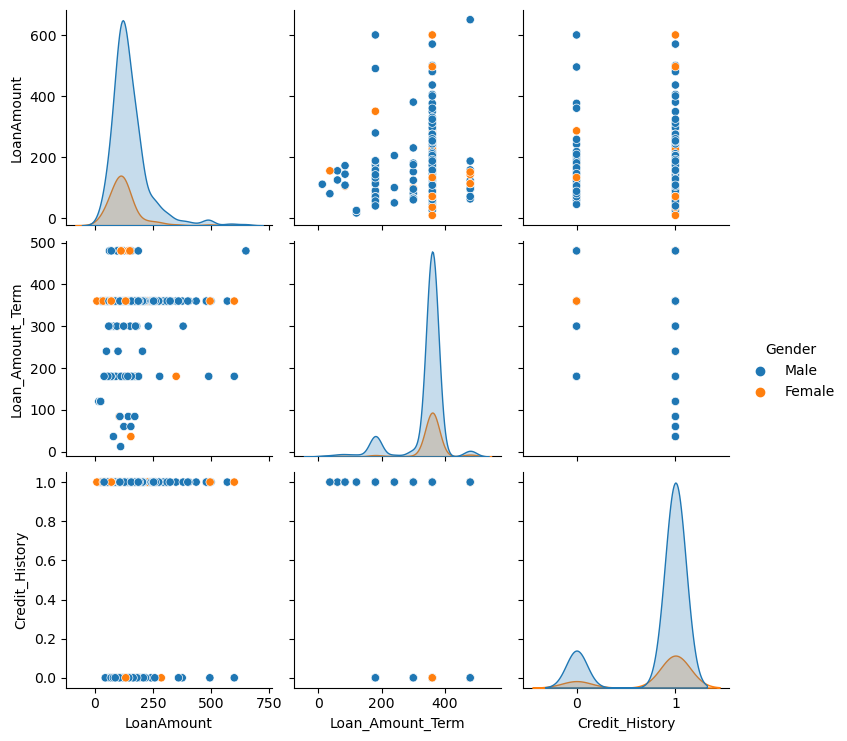

In [65]:
#multivariate analysis of continous data to categorical data
#cat=hue, num=vars
sns.pairplot(loan, 
             vars=['LoanAmount','Loan_Amount_Term', 'Credit_History'],
             hue='Gender')

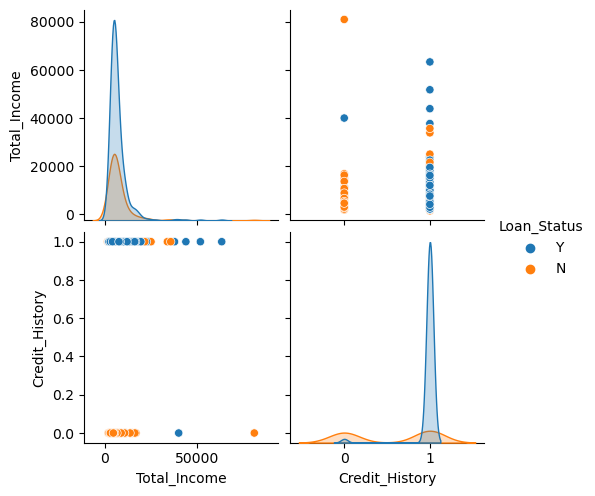

In [66]:
#multivariate analysis of continous data to categorical data
#cat=hue, num=vars
sns.pairplot(loan, 
             vars=['Total_Income','Credit_History'],
             hue='Loan_Status')

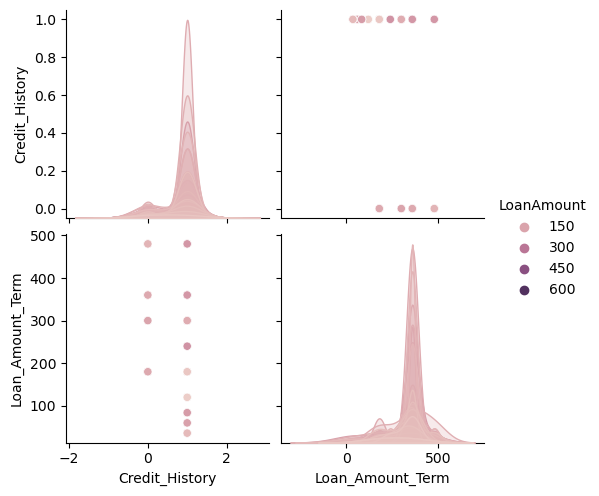

In [67]:
#Bivariate analysis of continous data to categorical data
#cat=hue, num=vars
sns.pairplot(loan, 
             vars=['Credit_History','Loan_Amount_Term'],
             hue= 'LoanAmount')

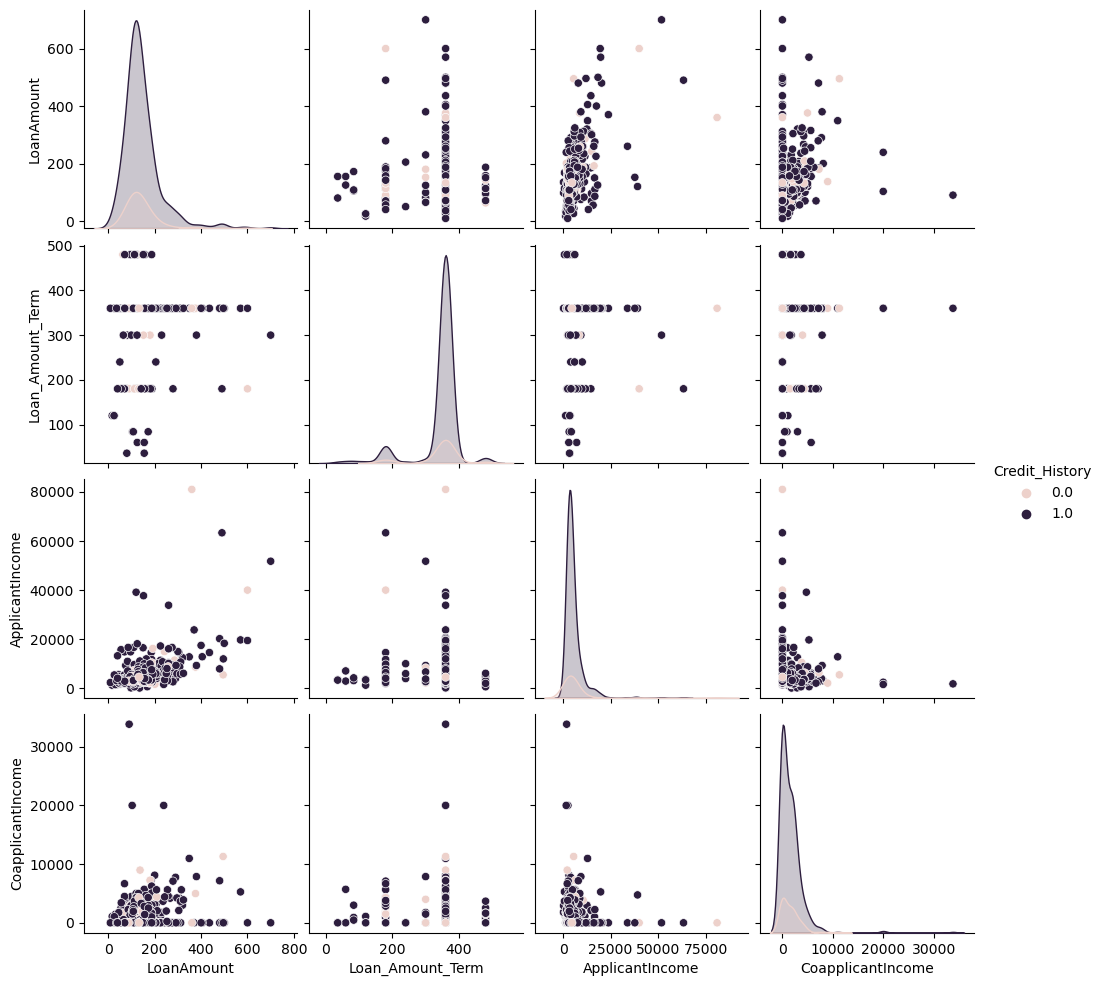

In [68]:
#Bivariate analysis of continous data to categorical data
#cat=hue, num=vars
sns.pairplot(loan, 
             vars=['LoanAmount','Loan_Amount_Term','ApplicantIncome', 'CoapplicantIncome' ],
             hue='Credit_History')

## Conclusion

<Axes: >

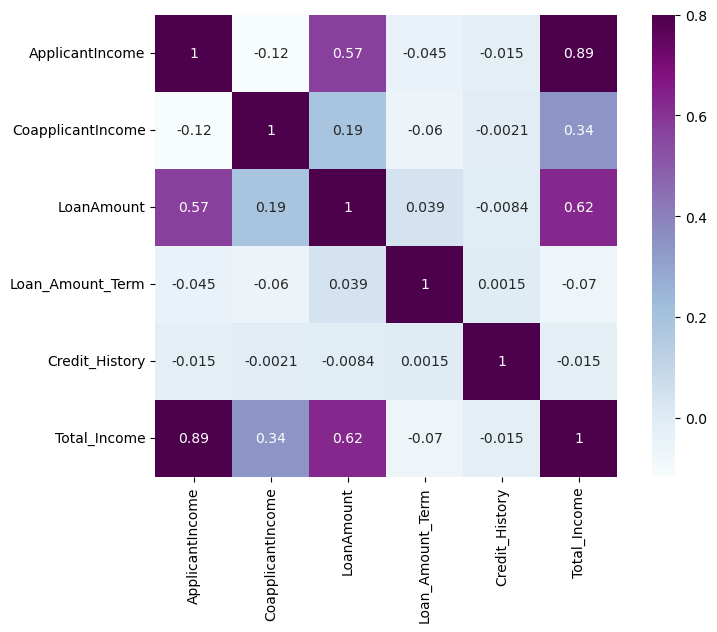

In [69]:
matrix = loan.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

In [70]:
# The variables with darker colors mean their correlation is more.
#applicant income to loan amount

